In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale


In [ ]:
dataset=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

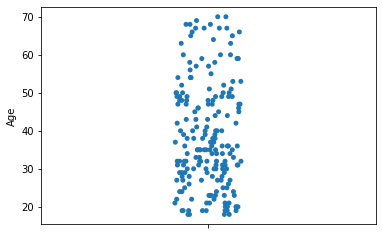

In [ ]:
sns.stripplot(y=dataset['Age'])

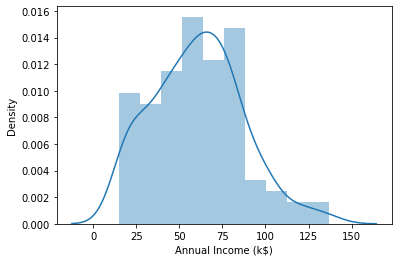

In [ ]:
sns.distplot(dataset["Annual Income (k$)"])  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


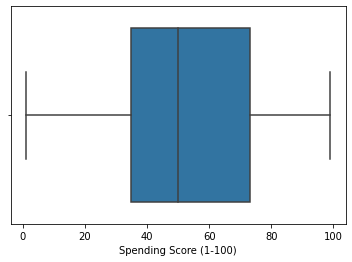

In [ ]:
sns.boxplot(dataset["Spending Score (1-100)"])

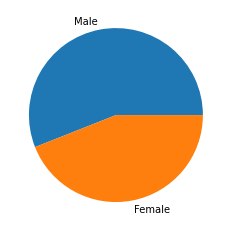

In [ ]:
plt.pie(dataset["Gender"].value_counts(),labels=dataset["Gender"].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


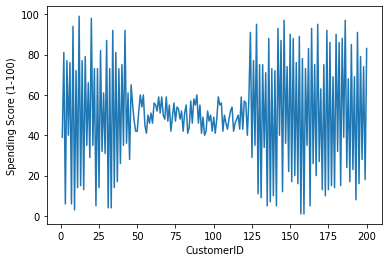

In [ ]:
sns.lineplot(dataset["CustomerID"],dataset["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


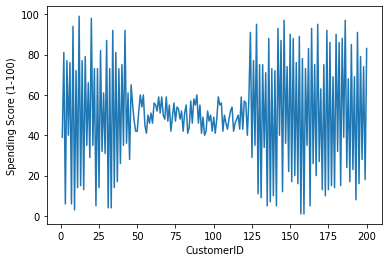

In [ ]:
sns.lineplot(dataset["CustomerID"],dataset["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


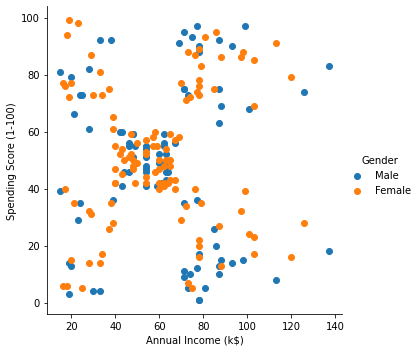

In [ ]:
sns.FacetGrid(dataset,hue="Gender",size=5).map(plt.scatter,"Annual Income (k$)","Spending Score (1-100)").add_legend()
plt.show()

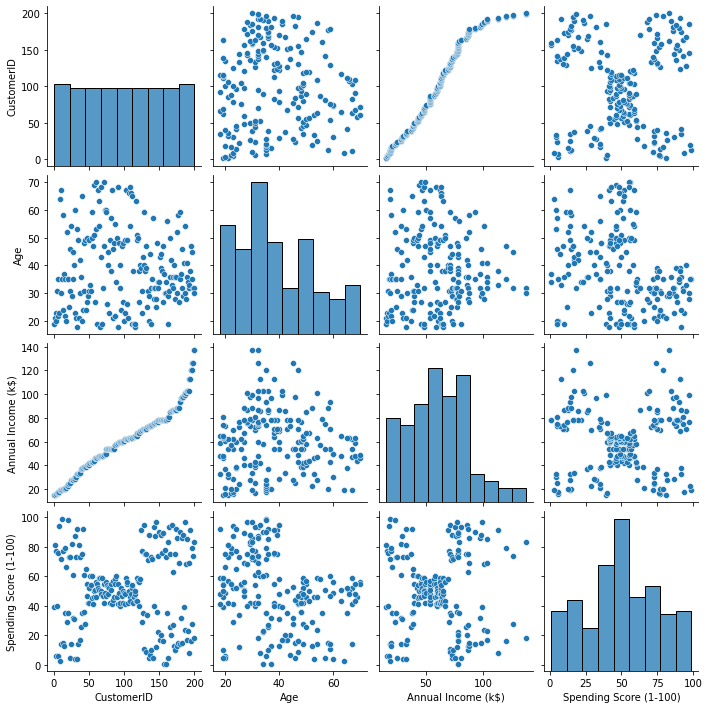

In [ ]:
sns.pairplot(dataset)

In [ ]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
dataset.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
dataset["Gender"].mode()

0    Female
dtype: object

In [ ]:
dataset["CustomerID"].mode()

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Length: 200, dtype: int64

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


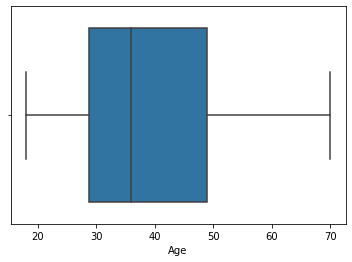

In [ ]:
sns.boxplot(dataset["Age"])

In [ ]:
Q1 = dataset['Spending Score (1-100)'].quantile(0.25)
Q3 = dataset['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
dataset['Spending Score (1-100)']=np.where(dataset['Spending Score (1-100)']>upper_whisker,upper_whisker,np.where(dataset['Spending Score (1-100)']<lower_whisker,lower_whisker,dataset['Spending Score (1-100)']))
dataset.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


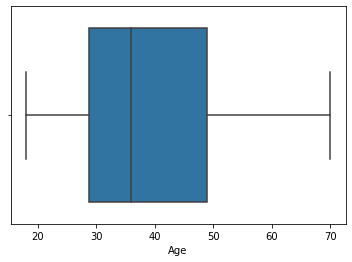

In [ ]:
sns.boxplot(dataset['Age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Gender=le.fit_transform(dataset.Gender)

In [ ]:
dataset["CustomerID"]=le.fit_transform(dataset["CustomerID"])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39.0
1,1,1,21,15,81.0
2,2,0,20,16,6.0
3,3,0,23,16,77.0
4,4,0,31,17,40.0


In [ ]:
df=dataset.drop("Spending Score (1-100)",axis=1)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39.0
1,1,1,21,15,81.0
2,2,0,20,16,6.0
3,3,0,23,16,77.0
4,4,0,31,17,40.0


In [ ]:
x= dataset.iloc[:, [1, 2]].values
x.shape

(200, 2)

In [ ]:
x

array([[ 1, 19],
       [ 1, 21],
       [ 0, 20],
       [ 0, 23],
       [ 0, 31],
       [ 0, 22],
       [ 0, 35],
       [ 0, 23],
       [ 1, 64],
       [ 0, 30],
       [ 1, 67],
       [ 0, 35],
       [ 0, 58],
       [ 0, 24],
       [ 1, 37],
       [ 1, 22],
       [ 0, 35],
       [ 1, 20],
       [ 1, 52],
       [ 0, 35],
       [ 1, 35],
       [ 1, 25],
       [ 0, 46],
       [ 1, 31],
       [ 0, 54],
       [ 1, 29],
       [ 0, 45],
       [ 1, 35],
       [ 0, 40],
       [ 0, 23],
       [ 1, 60],
       [ 0, 21],
       [ 1, 53],
       [ 1, 18],
       [ 0, 49],
       [ 0, 21],
       [ 0, 42],
       [ 0, 30],
       [ 0, 36],
       [ 0, 20],
       [ 0, 65],
       [ 1, 24],
       [ 1, 48],
       [ 0, 31],
       [ 0, 49],
       [ 0, 24],
       [ 0, 50],
       [ 0, 27],
       [ 0, 29],
       [ 0, 31],
       [ 0, 49],
       [ 1, 33],
       [ 0, 31],
       [ 1, 59],
       [ 0, 50],
       [ 1, 47],
       [ 0, 51],
       [ 1, 69],
       [ 0, 27

In [ ]:
y=dataset.iloc[:,-1].values
y

array([39., 81.,  6., 77., 40., 76.,  6., 94.,  3., 72., 14., 99., 15.,
       77., 13., 79., 35., 66., 29., 98., 35., 73.,  5., 73., 14., 82.,
       32., 61., 31., 87.,  4., 73.,  4., 92., 14., 81., 17., 73., 26.,
       75., 35., 92., 36., 61., 28., 65., 55., 47., 42., 42., 52., 60.,
       54., 60., 45., 41., 50., 46., 51., 46., 56., 55., 52., 59., 51.,
       59., 50., 48., 59., 47., 55., 42., 49., 56., 47., 54., 53., 48.,
       52., 42., 51., 55., 41., 44., 57., 46., 58., 55., 60., 46., 55.,
       41., 49., 40., 42., 52., 47., 50., 42., 49., 41., 48., 59., 55.,
       56., 42., 50., 46., 43., 48., 52., 54., 42., 46., 48., 50., 43.,
       59., 43., 57., 56., 40., 58., 91., 29., 77., 35., 95., 11., 75.,
        9., 75., 34., 71.,  5., 88.,  7., 73., 10., 72.,  5., 93., 40.,
       87., 12., 97., 36., 74., 22., 90., 17., 88., 20., 76., 16., 89.,
        1., 78.,  1., 73., 35., 83.,  5., 93., 26., 75., 20., 95., 27.,
       63., 13., 75., 10., 92., 13., 86., 15., 69., 14., 90., 32

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [ ]:
x_scaled

array([[ 1.12815215, -1.42456879],
       [ 1.12815215, -1.28103541],
       [-0.88640526, -1.3528021 ],
       [-0.88640526, -1.13750203],
       [-0.88640526, -0.56336851],
       [-0.88640526, -1.20926872],
       [-0.88640526, -0.27630176],
       [-0.88640526, -1.13750203],
       [ 1.12815215,  1.80493225],
       [-0.88640526, -0.6351352 ],
       [ 1.12815215,  2.02023231],
       [-0.88640526, -0.27630176],
       [-0.88640526,  1.37433211],
       [-0.88640526, -1.06573534],
       [ 1.12815215, -0.13276838],
       [ 1.12815215, -1.20926872],
       [-0.88640526, -0.27630176],
       [ 1.12815215, -1.3528021 ],
       [ 1.12815215,  0.94373197],
       [-0.88640526, -0.27630176],
       [ 1.12815215, -0.27630176],
       [ 1.12815215, -0.99396865],
       [-0.88640526,  0.51313183],
       [ 1.12815215, -0.56336851],
       [-0.88640526,  1.08726535],
       [ 1.12815215, -0.70690189],
       [-0.88640526,  0.44136514],
       [ 1.12815215, -0.27630176],
       [-0.88640526,

In [ ]:
x_scaled  = pd.DataFrame(x_scaled, columns = dataset.columns[2:4])
x_scaled

,Age,Annual Income (k$)
0,1.128152,-1.424569
1,1.128152,-1.281035
2,-0.886405,-1.352802
3,-0.886405,-1.137502
4,-0.886405,-0.563369
...,...,...
195,-0.886405,-0.276302
196,-0.886405,0.441365
197,1.128152,-0.491602
198,1.128152,-0.491602


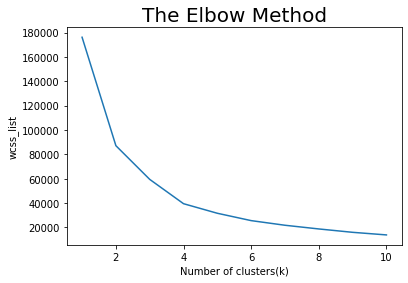

In [ ]:
X = dataset.iloc[:, [2, 3]].values
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method', fontsize = 20)  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

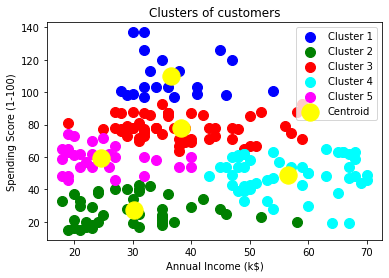

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

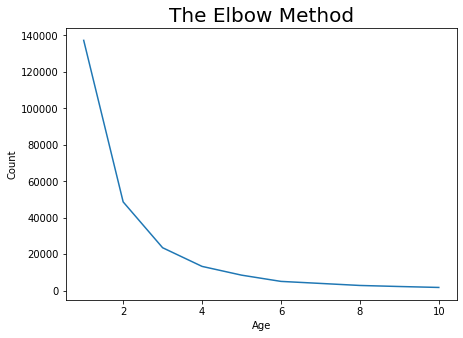

In [ ]:
X = dataset.iloc[:, [1, 3]].values
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


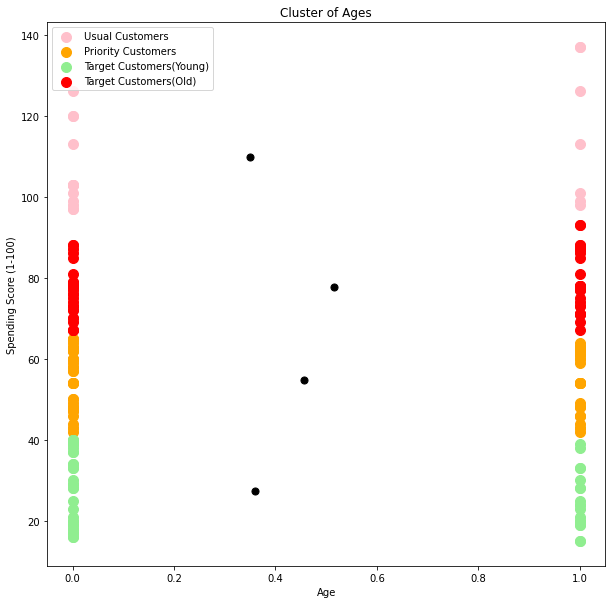

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages')

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train

array([[ 1, 39],
       [ 0, 47],
       [ 0, 32],
       [ 0, 35],
       [ 0, 38],
       [ 1, 48],
       [ 0, 50],
       [ 0, 31],
       [ 1, 33],
       [ 0, 55],
       [ 0, 35],
       [ 0, 68],
       [ 1, 32],
       [ 0, 49],
       [ 1, 25],
       [ 0, 50],
       [ 1, 66],
       [ 1, 37],
       [ 1, 35],
       [ 1, 32],
       [ 1, 28],
       [ 0, 50],
       [ 1, 19],
       [ 0, 35],
       [ 1, 68],
       [ 0, 67],
       [ 0, 20],
       [ 1, 53],
       [ 0, 44],
       [ 1, 32],
       [ 0, 31],
       [ 1, 67],
       [ 0, 47],
       [ 0, 60],
       [ 0, 45],
       [ 1, 59],
       [ 0, 30],
       [ 1, 43],
       [ 0, 40],
       [ 0, 38],
       [ 1, 34],
       [ 0, 32],
       [ 0, 49],
       [ 1, 19],
       [ 0, 32],
       [ 1, 65],
       [ 1, 24],
       [ 1, 63],
       [ 0, 33],
       [ 1, 24],
       [ 0, 32],
       [ 0, 31],
       [ 0, 29],
       [ 1, 48],
       [ 0, 24],
       [ 0, 29],
       [ 1, 31],
       [ 0, 54],
       [ 0, 29

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x, y)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=regressor.predict(x_test)
yu=regressor.predict([[ 19.  ,  15.  ]])
yu

array([61.73846429])

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-Score:",r2_score(y_test,y_pred))

MAE: 13.596705864043365
MSE: 305.0626790205609
RMSE: 17.466043599526508
R2-Score: 0.5746707495278889
